# Linear Algebra and Geometry: A Complete Deep Dive

## Table of Contents
1. [Introduction to Linear Algebra](#intro)
2. [Vectors: Foundations](#vectors)
3. [Vector Operations](#vector-ops)
4. [Dot Product and Projections](#dot-product)
5. [Cross Product and Applications](#cross-product)
6. [Matrices as Linear Transformations](#matrices)
7. [Matrix Operations](#matrix-ops)
8. [Linear Independence and Span](#linear-independence)
9. [Basis and Dimension](#basis)
10. [Matrix Determinant](#determinant)
11. [Matrix Inverse](#inverse)
12. [Systems of Linear Equations](#systems)
13. [Vector Spaces and Subspaces](#vector-spaces)
14. [Orthogonality](#orthogonality)
15. [Gram-Schmidt Process](#gram-schmidt)
16. [Linear Transformations Geometry](#transformations)
17. [Change of Basis](#change-basis)
18. [Applications in ML and Data Science](#applications)

---

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
import seaborn as sns
from scipy import linalg
import sympy as sp
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.set_printoptions(precision=4, suppress=True)

# Custom 3D arrow class
class Arrow3D(FancyArrowPatch):
    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)
        
    def do_3d_projection(self, renderer=None):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

        return np.min(zs)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
NumPy version: 2.0.2


## 1. Introduction to Linear Algebra <a name="intro"></a>

### What is Linear Algebra?

**Linear algebra** is the branch of mathematics concerning linear equations, linear functions, and their representations through matrices and vector spaces.

### Why Study Linear Algebra?

Linear algebra is fundamental to:
- **Machine Learning**: Neural networks, dimensionality reduction (PCA), recommendation systems
- **Computer Graphics**: 3D transformations, rendering, animations
- **Data Science**: Principal component analysis, least squares regression
- **Physics**: Quantum mechanics, relativity, electromagnetism
- **Engineering**: Control systems, signal processing, circuit analysis
- **Economics**: Input-output models, optimization

### Core Objects

1. **Vectors**: Quantities with magnitude and direction
2. **Matrices**: Rectangular arrays of numbers (linear transformations)
3. **Vector Spaces**: Sets of vectors with addition and scalar multiplication

### The Power of Linearity

A function $f$ is **linear** if:
1. $f(\mathbf{v} + \mathbf{w}) = f(\mathbf{v}) + f(\mathbf{w})$ (additivity)
2. $f(c\mathbf{v}) = c f(\mathbf{v})$ (homogeneity)

Linear functions preserve vector addition and scalar multiplication, making them analytically tractable and geometrically interpretable.

---

## 2. Vectors: Foundations <a name="vectors"></a>

### What is a Vector?

A **vector** can be thought of in three ways:

1. **Geometric**: An arrow with magnitude and direction
2. **Algebraic**: An ordered list of numbers
3. **Abstract**: An element of a vector space

### Notation

$$\mathbf{v} = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix}$$

### Examples in Different Dimensions

**2D vector**: $\mathbf{v} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}$ represents a point or displacement in the plane

**3D vector**: $\mathbf{v} = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}$ represents a point or displacement in 3D space

**n-D vector**: In machine learning, a data point with $n$ features is an $n$-dimensional vector

### Magnitude (Length)

The **magnitude** or **norm** of a vector:

$$\|\mathbf{v}\| = \sqrt{v_1^2 + v_2^2 + \cdots + v_n^2}$$

This is the Euclidean distance from the origin to the point.

### Unit Vectors

A **unit vector** has magnitude 1. To normalize a vector:

$$\hat{\mathbf{v}} = \frac{\mathbf{v}}{\|\mathbf{v}\|}$$

### Standard Basis Vectors

In $\mathbb{R}^3$:
$$\mathbf{i} = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}, \quad \mathbf{j} = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}, \quad \mathbf{k} = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$$

In [2]:
# Create and visualize vectors
print("="*70)
print("VECTORS: BASIC OPERATIONS")
print("="*70)

# Define vectors
v2d = np.array([3, 2])
v3d = np.array([1, 2, 3])
v_high = np.array([1, 2, 3, 4, 5])  # 5D vector

print("\n2D Vector:")
print(f"v = {v2d}")
print(f"Magnitude: ||v|| = {np.linalg.norm(v2d):.4f}")

print("\n3D Vector:")
print(f"v = {v3d}")
print(f"Magnitude: ||v|| = {np.linalg.norm(v3d):.4f}")
print(f"Calculation: sqrt({v3d[0]}² + {v3d[1]}² + {v3d[2]}²) = sqrt({v3d[0]**2 + v3d[1]**2 + v3d[2]**2}) = {np.linalg.norm(v3d):.4f}")

print("\n5D Vector (like ML feature vector):")
print(f"v = {v_high}")
print(f"Magnitude: ||v|| = {np.linalg.norm(v_high):.4f}")

# Unit vectors
print("\n" + "="*70)
print("UNIT VECTORS (Normalization)")
print("="*70)

v_hat = v3d / np.linalg.norm(v3d)
print(f"\nOriginal vector: {v3d}")
print(f"Magnitude: {np.linalg.norm(v3d):.4f}")
print(f"\nUnit vector: {v_hat}")
print(f"Magnitude: {np.linalg.norm(v_hat):.4f} (should be 1.0)")

# Standard basis vectors
print("\n" + "="*70)
print("STANDARD BASIS VECTORS")
print("="*70)

i = np.array([1, 0, 0])
j = np.array([0, 1, 0])
k = np.array([0, 0, 1])

print(f"\ni (x-axis): {i}")
print(f"j (y-axis): {j}")
print(f"k (z-axis): {k}")
print(f"\nAny 3D vector can be written as: v = v₁i + v₂j + v₃k")
print(f"Example: {v3d} = {v3d[0]}i + {v3d[1]}j + {v3d[2]}k")

VECTORS: BASIC OPERATIONS

2D Vector:
v = [3 2]
Magnitude: ||v|| = 3.6056

3D Vector:
v = [1 2 3]
Magnitude: ||v|| = 3.7417
Calculation: sqrt(1² + 2² + 3²) = sqrt(14) = 3.7417

5D Vector (like ML feature vector):
v = [1 2 3 4 5]
Magnitude: ||v|| = 7.4162

UNIT VECTORS (Normalization)

Original vector: [1 2 3]
Magnitude: 3.7417

Unit vector: [0.2673 0.5345 0.8018]
Magnitude: 1.0000 (should be 1.0)

STANDARD BASIS VECTORS

i (x-axis): [1 0 0]
j (y-axis): [0 1 0]
k (z-axis): [0 0 1]

Any 3D vector can be written as: v = v₁i + v₂j + v₃k
Example: [1 2 3] = 1i + 2j + 3k


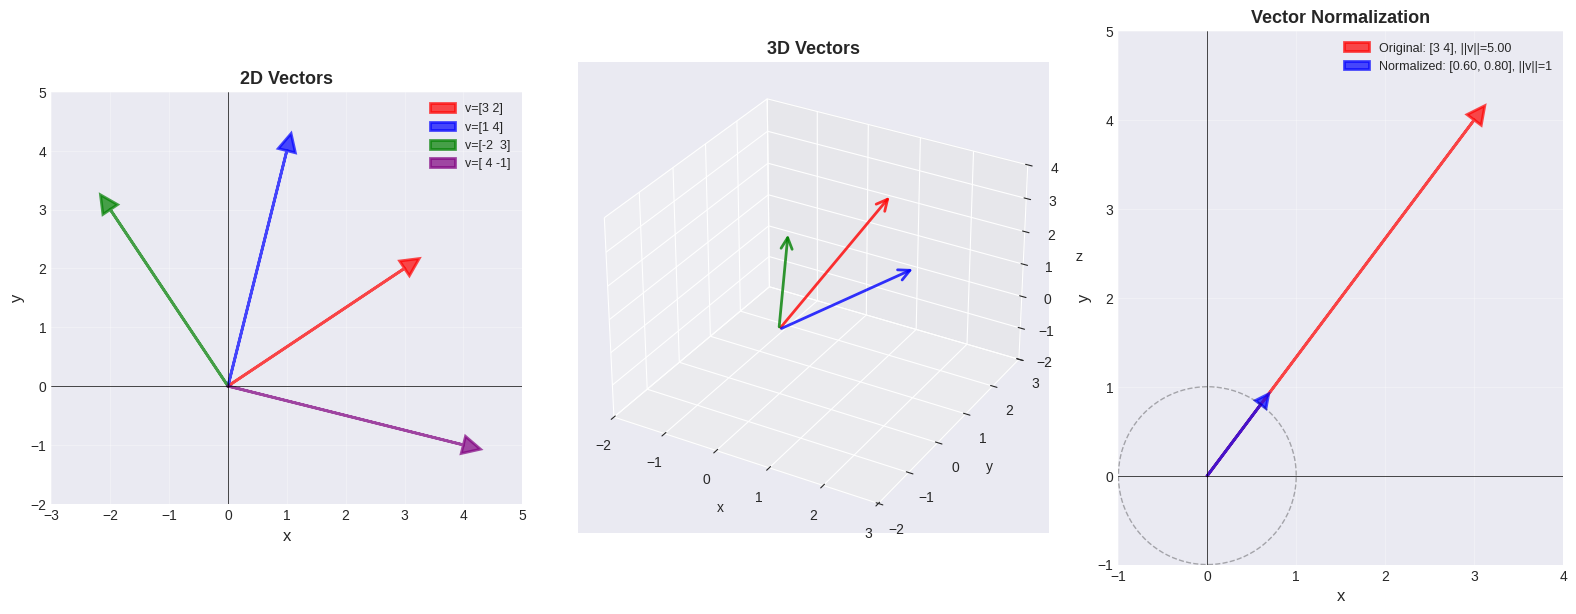

In [3]:
# Visualize vectors in 2D and 3D
fig = plt.figure(figsize=(16, 6))

# 2D vectors
ax1 = fig.add_subplot(131)
vectors_2d = np.array([[3, 2], [1, 4], [-2, 3], [4, -1]])
colors = ['red', 'blue', 'green', 'purple']

for vec, color in zip(vectors_2d, colors):
    ax1.arrow(0, 0, vec[0], vec[1], head_width=0.3, head_length=0.3,
             fc=color, ec=color, linewidth=2, alpha=0.7,
             label=f'v={vec}')

ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('2D Vectors', fontsize=13, fontweight='bold')
ax1.legend(fontsize=9)
ax1.set_xlim(-3, 5)
ax1.set_ylim(-2, 5)
ax1.set_aspect('equal')

# 3D vectors
ax2 = fig.add_subplot(132, projection='3d')
vectors_3d = np.array([[1, 2, 3], [2, 1, 2], [-1, 2, 1]])
colors_3d = ['red', 'blue', 'green']

for vec, color in zip(vectors_3d, colors_3d):
    arrow = Arrow3D(0, 0, 0, vec[0], vec[1], vec[2],
                   mutation_scale=20, lw=2, arrowstyle="->",
                   color=color, alpha=0.8)
    ax2.add_artist(arrow)

ax2.set_xlabel('x', fontsize=10)
ax2.set_ylabel('y', fontsize=10)
ax2.set_zlabel('z', fontsize=10)
ax2.set_title('3D Vectors', fontsize=13, fontweight='bold')
ax2.set_xlim(-2, 3)
ax2.set_ylim(-2, 3)
ax2.set_zlim(-2, 4)

# Vector normalization visualization
ax3 = fig.add_subplot(133)
v_original = np.array([3, 4])
v_norm = v_original / np.linalg.norm(v_original)

# Draw unit circle
theta = np.linspace(0, 2*np.pi, 100)
ax3.plot(np.cos(theta), np.sin(theta), 'k--', alpha=0.3, linewidth=1)

# Original vector
ax3.arrow(0, 0, v_original[0], v_original[1], head_width=0.2, head_length=0.2,
         fc='red', ec='red', linewidth=2, alpha=0.7,
         label=f'Original: {v_original}, ||v||={np.linalg.norm(v_original):.2f}')

# Normalized vector
ax3.arrow(0, 0, v_norm[0], v_norm[1], head_width=0.15, head_length=0.15,
         fc='blue', ec='blue', linewidth=2, alpha=0.7,
         label=f'Normalized: [{v_norm[0]:.2f}, {v_norm[1]:.2f}], ||v||=1')

ax3.axhline(y=0, color='k', linewidth=0.5)
ax3.axvline(x=0, color='k', linewidth=0.5)
ax3.grid(True, alpha=0.3)
ax3.set_xlabel('x', fontsize=12)
ax3.set_ylabel('y', fontsize=12)
ax3.set_title('Vector Normalization', fontsize=13, fontweight='bold')
ax3.legend(fontsize=9)
ax3.set_xlim(-1, 4)
ax3.set_ylim(-1, 5)
ax3.set_aspect('equal')

plt.tight_layout()
plt.show()

## 3. Vector Operations <a name="vector-ops"></a>

### Vector Addition

**Algebraically**:
$$\mathbf{v} + \mathbf{w} = \begin{bmatrix} v_1 \\ v_2 \end{bmatrix} + \begin{bmatrix} w_1 \\ w_2 \end{bmatrix} = \begin{bmatrix} v_1 + w_1 \\ v_2 + w_2 \end{bmatrix}$$

**Geometrically**: Tip-to-tail method or parallelogram rule

### Scalar Multiplication

$$c\mathbf{v} = c\begin{bmatrix} v_1 \\ v_2 \end{bmatrix} = \begin{bmatrix} cv_1 \\ cv_2 \end{bmatrix}$$

- If $c > 1$: stretches the vector
- If $0 < c < 1$: shrinks the vector
- If $c < 0$: reverses direction

### Vector Subtraction

$$\mathbf{v} - \mathbf{w} = \mathbf{v} + (-1)\mathbf{w}$$

Geometrically: Vector from the tip of $\mathbf{w}$ to the tip of $\mathbf{v}$

### Linear Combinations

A **linear combination** of vectors $\mathbf{v}_1, ..., \mathbf{v}_n$ is:

$$c_1\mathbf{v}_1 + c_2\mathbf{v}_2 + \cdots + c_n\mathbf{v}_n$$

where $c_1, ..., c_n$ are scalars.

### Properties

Vector addition and scalar multiplication satisfy:
1. **Commutativity**: $\mathbf{v} + \mathbf{w} = \mathbf{w} + \mathbf{v}$
2. **Associativity**: $(\mathbf{u} + \mathbf{v}) + \mathbf{w} = \mathbf{u} + (\mathbf{v} + \mathbf{w})$
3. **Identity**: $\mathbf{v} + \mathbf{0} = \mathbf{v}$
4. **Distributivity**: $c(\mathbf{v} + \mathbf{w}) = c\mathbf{v} + c\mathbf{w}$

In [4]:
# Vector operations
print("="*70)
print("VECTOR OPERATIONS")
print("="*70)

v = np.array([2, 3])
w = np.array([1, -1])

print("\nVector Addition:")
print(f"v = {v}")
print(f"w = {w}")
print(f"v + w = {v + w}")

print("\nScalar Multiplication:")
c = 2.5
print(f"c = {c}")
print(f"c·v = {c * v}")

print("\nVector Subtraction:")
print(f"v - w = {v - w}")

print("\nLinear Combination:")
v1 = np.array([1, 2])
v2 = np.array([3, 1])
c1, c2 = 2, -1
result = c1 * v1 + c2 * v2
print(f"{c1}·{v1} + {c2}·{v2} = {result}")

# Verify properties
print("\n" + "="*70)
print("VERIFYING VECTOR SPACE PROPERTIES")
print("="*70)

u = np.array([1, 1])
v = np.array([2, 3])
w = np.array([1, -1])
c = 2
d = 3

print("\n1. Commutativity: v + w = w + v")
print(f"   v + w = {v + w}")
print(f"   w + v = {w + v}")
print(f"   Equal? {np.allclose(v + w, w + v)} ✓")

print("\n2. Associativity: (u + v) + w = u + (v + w)")
left = (u + v) + w
right = u + (v + w)
print(f"   (u + v) + w = {left}")
print(f"   u + (v + w) = {right}")
print(f"   Equal? {np.allclose(left, right)} ✓")

print("\n3. Distributivity: c(v + w) = cv + cw")
left = c * (v + w)
right = c * v + c * w
print(f"   c(v + w) = {left}")
print(f"   cv + cw = {right}")
print(f"   Equal? {np.allclose(left, right)} ✓")

print("\n4. Distributivity: (c + d)v = cv + dv")
left = (c + d) * v
right = c * v + d * v
print(f"   (c + d)v = {left}")
print(f"   cv + dv = {right}")
print(f"   Equal? {np.allclose(left, right)} ✓")

VECTOR OPERATIONS

Vector Addition:
v = [2 3]
w = [ 1 -1]
v + w = [3 2]

Scalar Multiplication:
c = 2.5
c·v = [5.  7.5]

Vector Subtraction:
v - w = [1 4]

Linear Combination:
2·[1 2] + -1·[3 1] = [-1  3]

VERIFYING VECTOR SPACE PROPERTIES

1. Commutativity: v + w = w + v
   v + w = [3 2]
   w + v = [3 2]
   Equal? True ✓

2. Associativity: (u + v) + w = u + (v + w)
   (u + v) + w = [4 3]
   u + (v + w) = [4 3]
   Equal? True ✓

3. Distributivity: c(v + w) = cv + cw
   c(v + w) = [6 4]
   cv + cw = [6 4]
   Equal? True ✓

4. Distributivity: (c + d)v = cv + dv
   (c + d)v = [10 15]
   cv + dv = [10 15]
   Equal? True ✓


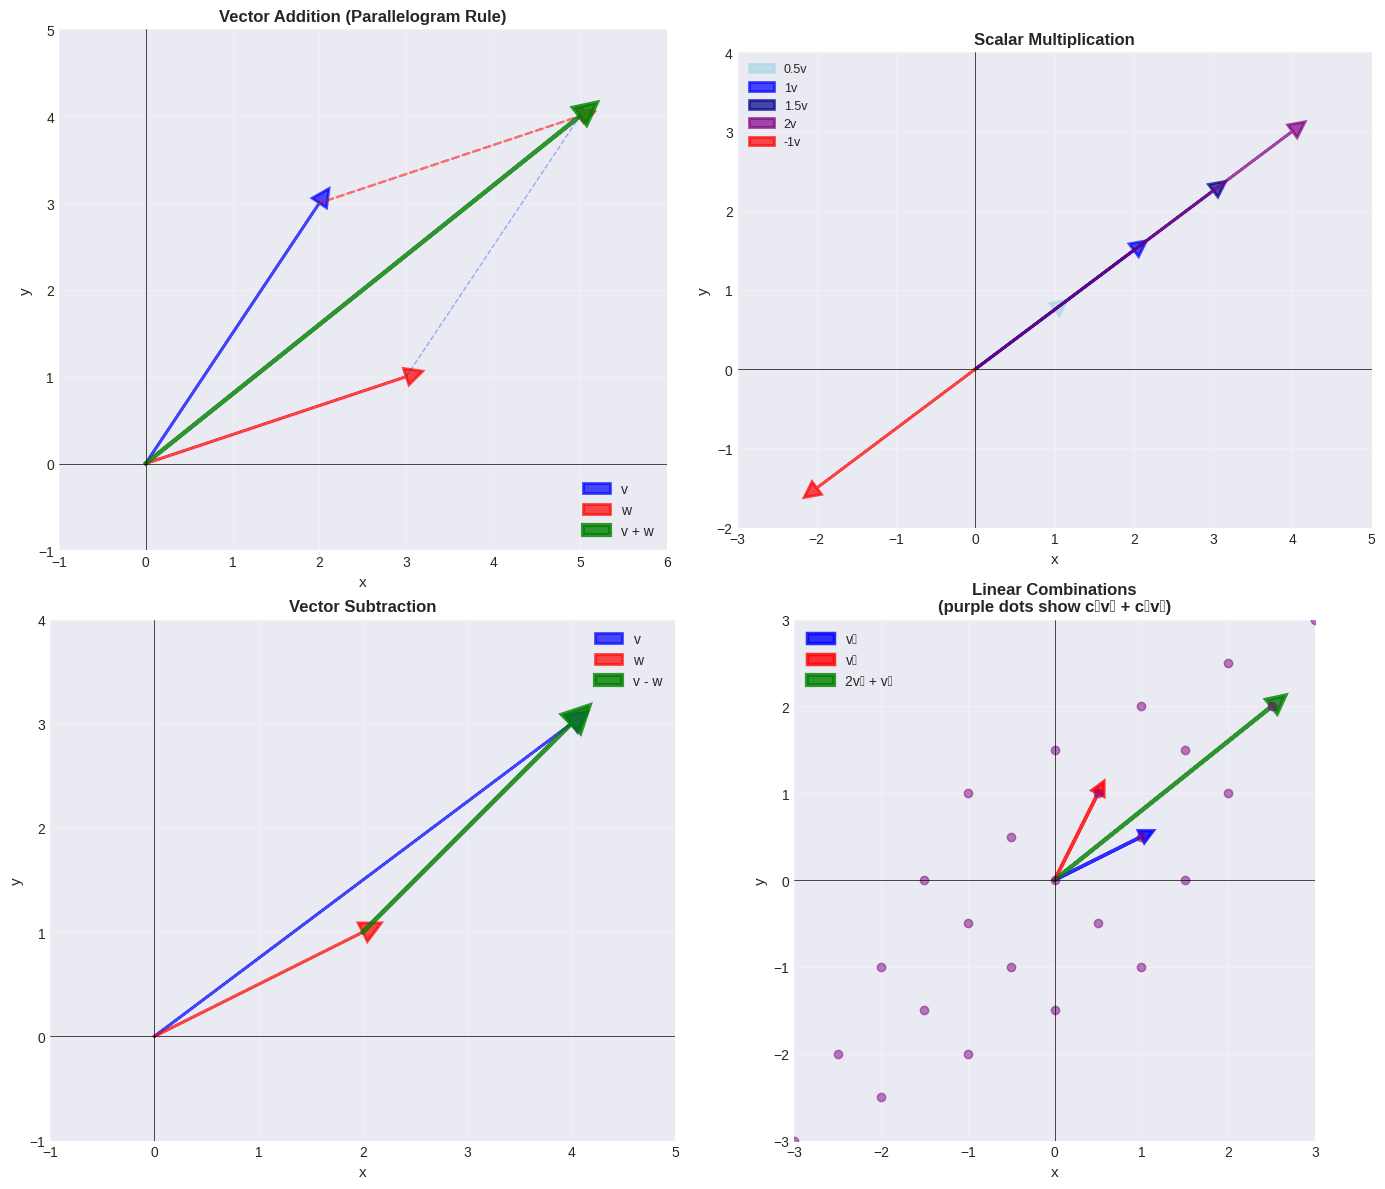

In [5]:
# Visualize vector operations
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

v = np.array([2, 3])
w = np.array([3, 1])

# Vector addition
ax = axes[0, 0]
ax.arrow(0, 0, v[0], v[1], head_width=0.2, head_length=0.2,
        fc='blue', ec='blue', linewidth=2, label='v', alpha=0.7)
ax.arrow(0, 0, w[0], w[1], head_width=0.2, head_length=0.2,
        fc='red', ec='red', linewidth=2, label='w', alpha=0.7)

# Tip-to-tail
ax.arrow(v[0], v[1], w[0], w[1], head_width=0.2, head_length=0.2,
        fc='red', ec='red', linewidth=1.5, linestyle='--', alpha=0.5)

# Result
result = v + w
ax.arrow(0, 0, result[0], result[1], head_width=0.25, head_length=0.25,
        fc='green', ec='green', linewidth=3, label='v + w', alpha=0.8)

# Parallelogram
ax.plot([w[0], result[0]], [w[1], result[1]], 'b--', alpha=0.3, linewidth=1)

ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.grid(True, alpha=0.3)
ax.set_xlabel('x', fontsize=11)
ax.set_ylabel('y', fontsize=11)
ax.set_title('Vector Addition (Parallelogram Rule)', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 5)
ax.set_aspect('equal')

# Scalar multiplication
ax = axes[0, 1]
v = np.array([2, 1.5])
scalars = [0.5, 1, 1.5, 2, -1]
colors_scale = ['lightblue', 'blue', 'darkblue', 'purple', 'red']

for scalar, color in zip(scalars, colors_scale):
    scaled = scalar * v
    ax.arrow(0, 0, scaled[0], scaled[1], head_width=0.2, head_length=0.2,
            fc=color, ec=color, linewidth=2, alpha=0.7,
            label=f'{scalar}v')

ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.grid(True, alpha=0.3)
ax.set_xlabel('x', fontsize=11)
ax.set_ylabel('y', fontsize=11)
ax.set_title('Scalar Multiplication', fontsize=12, fontweight='bold')
ax.legend(fontsize=9)
ax.set_xlim(-3, 5)
ax.set_ylim(-2, 4)
ax.set_aspect('equal')

# Vector subtraction
ax = axes[1, 0]
v = np.array([4, 3])
w = np.array([2, 1])
diff = v - w

ax.arrow(0, 0, v[0], v[1], head_width=0.2, head_length=0.2,
        fc='blue', ec='blue', linewidth=2, label='v', alpha=0.7)
ax.arrow(0, 0, w[0], w[1], head_width=0.2, head_length=0.2,
        fc='red', ec='red', linewidth=2, label='w', alpha=0.7)
ax.arrow(w[0], w[1], diff[0], diff[1], head_width=0.25, head_length=0.25,
        fc='green', ec='green', linewidth=3, label='v - w', alpha=0.8)

ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.grid(True, alpha=0.3)
ax.set_xlabel('x', fontsize=11)
ax.set_ylabel('y', fontsize=11)
ax.set_title('Vector Subtraction', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 4)
ax.set_aspect('equal')

# Linear combinations
ax = axes[1, 1]
v1 = np.array([1, 0.5])
v2 = np.array([0.5, 1])

# Show several linear combinations
for i in range(-2, 3):
    for j in range(-2, 3):
        result = i * v1 + j * v2
        ax.plot(result[0], result[1], 'o', markersize=6, alpha=0.5, color='purple')

# Highlight basis vectors
ax.arrow(0, 0, v1[0], v1[1], head_width=0.15, head_length=0.15,
        fc='blue', ec='blue', linewidth=2.5, label='v₁', alpha=0.8)
ax.arrow(0, 0, v2[0], v2[1], head_width=0.15, head_length=0.15,
        fc='red', ec='red', linewidth=2.5, label='v₂', alpha=0.8)

# Specific example
example = 2 * v1 + 1 * v2
ax.arrow(0, 0, example[0], example[1], head_width=0.2, head_length=0.2,
        fc='green', ec='green', linewidth=3, label='2v₁ + v₂', alpha=0.8)

ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.grid(True, alpha=0.3)
ax.set_xlabel('x', fontsize=11)
ax.set_ylabel('y', fontsize=11)
ax.set_title('Linear Combinations\n(purple dots show c₁v₁ + c₂v₂)', 
            fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

## 4. Dot Product and Projections <a name="dot-product"></a>

### Dot Product (Inner Product)

**Algebraic definition**:
$$\mathbf{v} \cdot \mathbf{w} = v_1w_1 + v_2w_2 + \cdots + v_nw_n = \sum_{i=1}^n v_iw_i$$

**Geometric definition**:
$$\mathbf{v} \cdot \mathbf{w} = \|\mathbf{v}\| \|\mathbf{w}\| \cos(\theta)$$

where $\theta$ is the angle between the vectors.

### Properties

1. **Commutative**: $\mathbf{v} \cdot \mathbf{w} = \mathbf{w} \cdot \mathbf{v}$
2. **Distributive**: $\mathbf{u} \cdot (\mathbf{v} + \mathbf{w}) = \mathbf{u} \cdot \mathbf{v} + \mathbf{u} \cdot \mathbf{w}$
3. **Homogeneous**: $(c\mathbf{v}) \cdot \mathbf{w} = c(\mathbf{v} \cdot \mathbf{w})$
4. **Positive definite**: $\mathbf{v} \cdot \mathbf{v} = \|\mathbf{v}\|^2 \geq 0$

### Finding the Angle

$$\cos(\theta) = \frac{\mathbf{v} \cdot \mathbf{w}}{\|\mathbf{v}\| \|\mathbf{w}\|}$$

$$\theta = \arccos\left(\frac{\mathbf{v} \cdot \mathbf{w}}{\|\mathbf{v}\| \|\mathbf{w}\|}\right)$$

### Orthogonality

Two vectors are **orthogonal** (perpendicular) if:
$$\mathbf{v} \cdot \mathbf{w} = 0$$

### Projection

The **scalar projection** of $\mathbf{v}$ onto $\mathbf{w}$ is:
$$\text{comp}_\mathbf{w}\mathbf{v} = \frac{\mathbf{v} \cdot \mathbf{w}}{\|\mathbf{w}\|}$$

The **vector projection** of $\mathbf{v}$ onto $\mathbf{w}$ is:
$$\text{proj}_\mathbf{w}\mathbf{v} = \frac{\mathbf{v} \cdot \mathbf{w}}{\mathbf{w} \cdot \mathbf{w}}\mathbf{w} = \frac{\mathbf{v} \cdot \mathbf{w}}{\|\mathbf{w}\|^2}\mathbf{w}$$

### Applications

- **Work in physics**: $W = \mathbf{F} \cdot \mathbf{d}$
- **Cosine similarity**: Measure of similarity between vectors
- **Machine learning**: Feature similarity, recommendation systems

In [6]:
# Dot product calculations
print("="*70)
print("DOT PRODUCT AND PROJECTIONS")
print("="*70)

v = np.array([3, 4])
w = np.array([2, 1])

# Dot product
dot_product = np.dot(v, w)
print("\nDot Product:")
print(f"v = {v}")
print(f"w = {w}")
print(f"v · w = {v[0]}×{w[0]} + {v[1]}×{w[1]} = {dot_product}")

# Magnitude and angle
mag_v = np.linalg.norm(v)
mag_w = np.linalg.norm(w)
cos_theta = dot_product / (mag_v * mag_w)
theta = np.arccos(cos_theta)
theta_degrees = np.degrees(theta)

print("\nAngle Between Vectors:")
print(f"||v|| = {mag_v:.4f}")
print(f"||w|| = {mag_w:.4f}")
print(f"cos(θ) = (v·w)/(||v|| ||w||) = {dot_product}/({mag_v:.4f}×{mag_w:.4f}) = {cos_theta:.4f}")
print(f"θ = {theta:.4f} radians = {theta_degrees:.2f}°")

# Verify geometric formula
dot_geometric = mag_v * mag_w * cos_theta
print(f"\nVerification: ||v|| ||w|| cos(θ) = {dot_geometric:.4f}")
print(f"Matches algebraic formula? {np.isclose(dot_product, dot_geometric)} ✓")

# Orthogonality test
print("\n" + "="*70)
print("ORTHOGONALITY")
print("="*70)

v_orth = np.array([1, 0])
w_orth = np.array([0, 1])
print(f"\nv = {v_orth}")
print(f"w = {w_orth}")
print(f"v · w = {np.dot(v_orth, w_orth)}")
print(f"Orthogonal? {np.dot(v_orth, w_orth) == 0} ✓")

# Projection
print("\n" + "="*70)
print("VECTOR PROJECTION")
print("="*70)

v = np.array([3, 4])
w = np.array([5, 0])  # Along x-axis

# Scalar projection
scalar_proj = np.dot(v, w) / np.linalg.norm(w)
print(f"\nProjecting v = {v} onto w = {w}")
print(f"Scalar projection: comp_w(v) = (v·w)/||w|| = {scalar_proj:.4f}")

# Vector projection
vector_proj = (np.dot(v, w) / np.dot(w, w)) * w
print(f"Vector projection: proj_w(v) = {vector_proj}")

# Perpendicular component
perp = v - vector_proj
print(f"\nPerpendicular component: v - proj_w(v) = {perp}")
print(f"Verification: proj_w(v) + perp = {vector_proj + perp}")
print(f"Equals original v? {np.allclose(v, vector_proj + perp)} ✓")
print(f"\nAre proj and perp orthogonal? {np.isclose(np.dot(vector_proj, perp), 0)} ✓")

DOT PRODUCT AND PROJECTIONS

Dot Product:
v = [3 4]
w = [2 1]
v · w = 3×2 + 4×1 = 10

Angle Between Vectors:
||v|| = 5.0000
||w|| = 2.2361
cos(θ) = (v·w)/(||v|| ||w||) = 10/(5.0000×2.2361) = 0.8944
θ = 0.4636 radians = 26.57°

Verification: ||v|| ||w|| cos(θ) = 10.0000
Matches algebraic formula? True ✓

ORTHOGONALITY

v = [1 0]
w = [0 1]
v · w = 0
Orthogonal? True ✓

VECTOR PROJECTION

Projecting v = [3 4] onto w = [5 0]
Scalar projection: comp_w(v) = (v·w)/||w|| = 3.0000
Vector projection: proj_w(v) = [3. 0.]

Perpendicular component: v - proj_w(v) = [0. 4.]
Verification: proj_w(v) + perp = [3. 4.]
Equals original v? True ✓

Are proj and perp orthogonal? True ✓


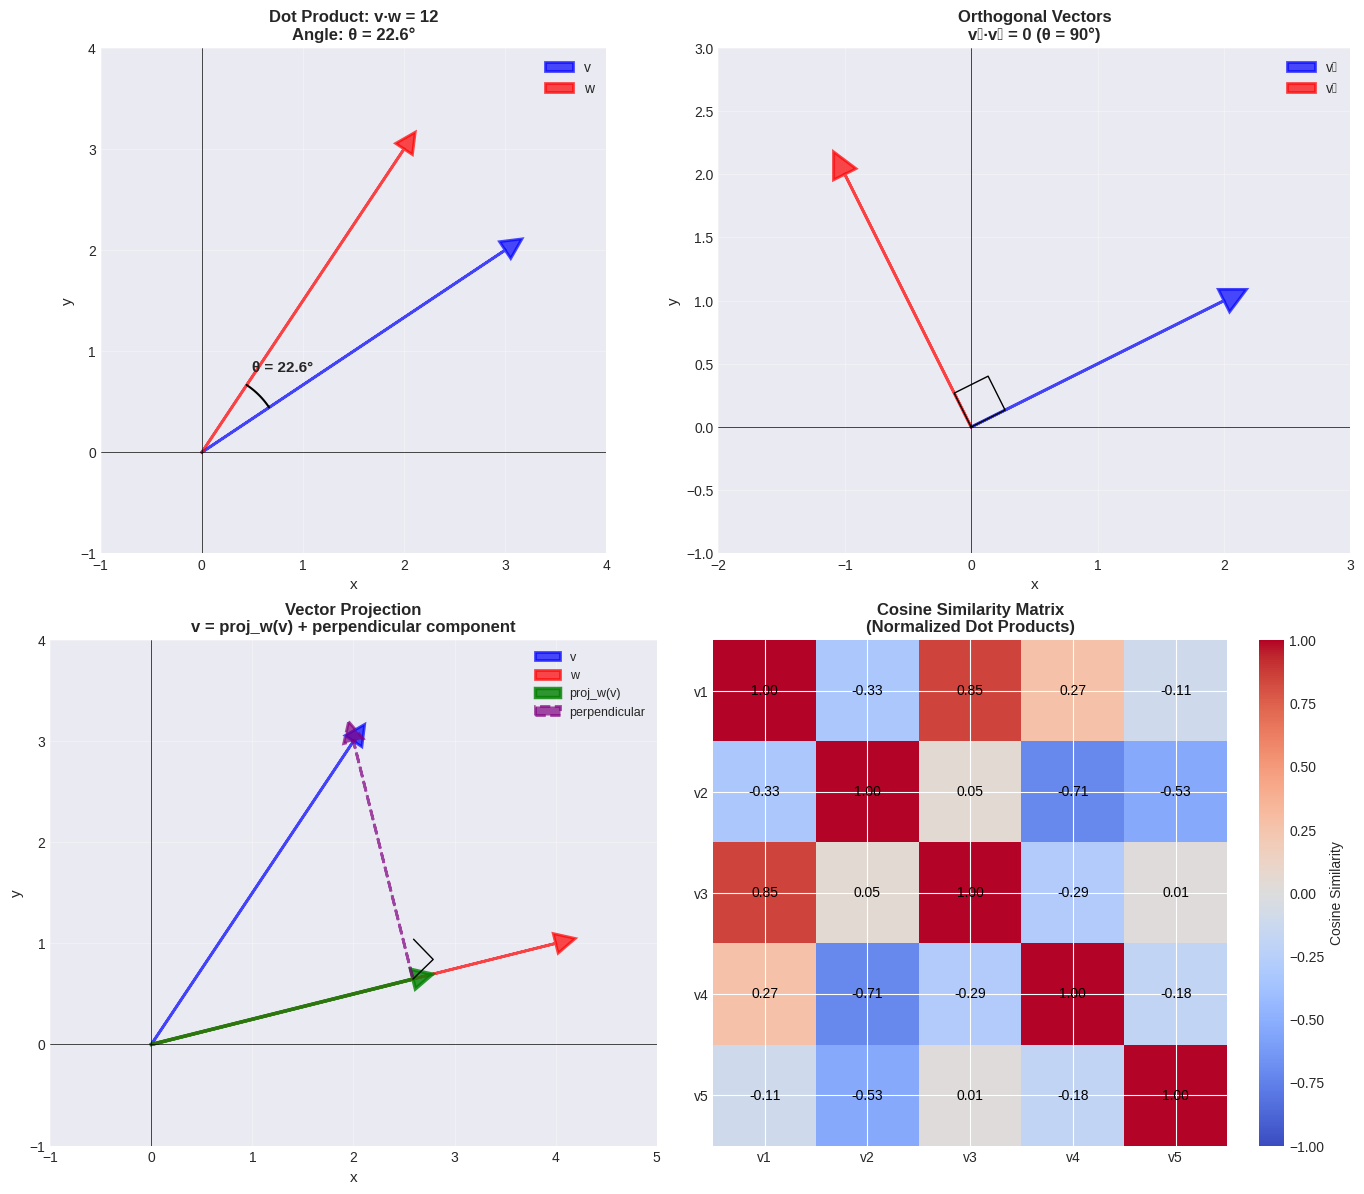

In [7]:
# Visualize dot product and projections
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Dot product and angle
ax = axes[0, 0]
v = np.array([3, 2])
w = np.array([2, 3])

ax.arrow(0, 0, v[0], v[1], head_width=0.2, head_length=0.2,
        fc='blue', ec='blue', linewidth=2, label='v', alpha=0.7)
ax.arrow(0, 0, w[0], w[1], head_width=0.2, head_length=0.2,
        fc='red', ec='red', linewidth=2, label='w', alpha=0.7)

# Draw angle arc
theta = np.arccos(np.dot(v, w) / (np.linalg.norm(v) * np.linalg.norm(w)))
arc_radius = 0.8
angle_v = np.arctan2(v[1], v[0])
angle_w = np.arctan2(w[1], w[0])
angles = np.linspace(min(angle_v, angle_w), max(angle_v, angle_w), 50)
ax.plot(arc_radius * np.cos(angles), arc_radius * np.sin(angles), 'k-', linewidth=1.5)
ax.text(0.5, 0.8, f'θ = {np.degrees(theta):.1f}°', fontsize=11, fontweight='bold')

ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.grid(True, alpha=0.3)
ax.set_xlabel('x', fontsize=11)
ax.set_ylabel('y', fontsize=11)
ax.set_title(f'Dot Product: v·w = {np.dot(v, w)}\nAngle: θ = {np.degrees(theta):.1f}°', 
            fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 4)
ax.set_aspect('equal')

# Orthogonal vectors
ax = axes[0, 1]
v1 = np.array([2, 1])
v2 = np.array([-1, 2])

ax.arrow(0, 0, v1[0], v1[1], head_width=0.2, head_length=0.2,
        fc='blue', ec='blue', linewidth=2, label='v₁', alpha=0.7)
ax.arrow(0, 0, v2[0], v2[1], head_width=0.2, head_length=0.2,
        fc='red', ec='red', linewidth=2, label='v₂', alpha=0.7)

# Draw right angle indicator
square_size = 0.3
square = np.array([[0, square_size, square_size, 0, 0],
                   [0, 0, square_size, square_size, 0]])
# Rotate square to align with v1
angle = np.arctan2(v1[1], v1[0])
rotation = np.array([[np.cos(angle), -np.sin(angle)],
                     [np.sin(angle), np.cos(angle)]])
square_rot = rotation @ square
ax.plot(square_rot[0], square_rot[1], 'k-', linewidth=1)

ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.grid(True, alpha=0.3)
ax.set_xlabel('x', fontsize=11)
ax.set_ylabel('y', fontsize=11)
ax.set_title(f'Orthogonal Vectors\nv₁·v₂ = {np.dot(v1, v2)} (θ = 90°)', 
            fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.set_xlim(-2, 3)
ax.set_ylim(-1, 3)
ax.set_aspect('equal')

# Vector projection
ax = axes[1, 0]
v = np.array([2, 3])
w = np.array([4, 1])

# Calculate projection
proj = (np.dot(v, w) / np.dot(w, w)) * w
perp = v - proj

ax.arrow(0, 0, v[0], v[1], head_width=0.2, head_length=0.2,
        fc='blue', ec='blue', linewidth=2, label='v', alpha=0.7)
ax.arrow(0, 0, w[0], w[1], head_width=0.2, head_length=0.2,
        fc='red', ec='red', linewidth=2, label='w', alpha=0.7)
ax.arrow(0, 0, proj[0], proj[1], head_width=0.2, head_length=0.2,
        fc='green', ec='green', linewidth=2.5, label='proj_w(v)', alpha=0.8)
ax.arrow(proj[0], proj[1], perp[0], perp[1], head_width=0.2, head_length=0.2,
        fc='purple', ec='purple', linewidth=2, label='perpendicular', 
        linestyle='--', alpha=0.7)

# Draw perpendicular indicator
ax.plot([proj[0], proj[0]+0.2, proj[0]+0.2-perp[1]/np.linalg.norm(perp)*0.2],
       [proj[1], proj[1]+perp[1]/np.linalg.norm(perp)*0.2, proj[1]+perp[1]/np.linalg.norm(perp)*0.2+0.2],
       'k-', linewidth=1)

ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.grid(True, alpha=0.3)
ax.set_xlabel('x', fontsize=11)
ax.set_ylabel('y', fontsize=11)
ax.set_title('Vector Projection\nv = proj_w(v) + perpendicular component', 
            fontsize=12, fontweight='bold')
ax.legend(fontsize=9)
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 4)
ax.set_aspect('equal')

# Cosine similarity heatmap
ax = axes[1, 1]
n_vectors = 5
vectors = np.random.randn(n_vectors, 3)
vectors = vectors / np.linalg.norm(vectors, axis=1, keepdims=True)  # Normalize

# Compute cosine similarity matrix
cos_sim = vectors @ vectors.T

im = ax.imshow(cos_sim, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')
ax.set_xticks(range(n_vectors))
ax.set_yticks(range(n_vectors))
ax.set_xticklabels([f'v{i+1}' for i in range(n_vectors)])
ax.set_yticklabels([f'v{i+1}' for i in range(n_vectors)])

# Add text annotations
for i in range(n_vectors):
    for j in range(n_vectors):
        text = ax.text(j, i, f'{cos_sim[i, j]:.2f}',
                      ha="center", va="center", color="black", fontsize=10)

plt.colorbar(im, ax=ax, label='Cosine Similarity')
ax.set_title('Cosine Similarity Matrix\n(Normalized Dot Products)', 
            fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## Summary: Part 1

### Vectors
- **Geometric**: Arrows with magnitude and direction
- **Algebraic**: Ordered lists of numbers
- **Operations**: Addition, scalar multiplication, linear combinations

### Dot Product
- **Algebraic**: $\mathbf{v} \cdot \mathbf{w} = \sum v_iw_i$
- **Geometric**: $\mathbf{v} \cdot \mathbf{w} = \|\mathbf{v}\|\|\mathbf{w}\|\cos(\theta)$
- **Applications**: Angles, projections, similarity measures

### Key Insights
1. Vectors generalize to any dimension
2. Geometric intuition in 2D/3D extends to higher dimensions
3. Linear operations preserve structure
4. Dot product connects algebra with geometry

---

*Note: This is Part 1 of the Linear Algebra notebook. The complete notebook contains sections on matrices, linear transformations, eigenvalues, and applications.*